# Specfem2D Workstation Example

To demonstrate the inversion capabilities of SeisFlows, we will run a __Specfem2D synthetic-synthetic example__ on a __local machine__ (tested on a Linux workstation running CentOS 7, and an Apple Laptop running macOS 10.14.6). Many of the setup steps here may be unique to our OS and workstation, but hopefully they may serve as templates for new Users wanting to explore SeisFlows. 

The numerical solver we will use is: [SPECFEM2D](https://geodynamics.org/cig/software/specfem2d/). We'll also be working in our `seisflows` [Conda](https://docs.conda.io/en/latest/) environment, see the installation documentation page for instructions on how to install and activate the required Conda environment.

-----------------------------------

## Option 1: Automated run

We have set up this example to run using a single command line argument. The following command will run an example script which will (1) download and compile SPECFEM2D, (2) setup a SPECFEM2D working directory to generate initial and target models, and (3) Run a SeisFlows inversion. 

### Example \#1
Example \#1 runs a 2 iteration inversion using SPECFEM2D, the default preprocessing module and a gradient descent optimization algorithm.

In [1]:
! seisflows examples 1  # print example help dialogue

1 example: ex1_specfem2d_workstation_inversion

                                    @@@@@@@@@@                        
                               .@@@@.    .%&(  %@.          
                            @@@@   @@@@   &@@@@@@ ,%@       
                         @@@@   @@@,  /@@              @    
                        @@@   @@@@   @@@              @     
                      @@@@   @@@@   @@@                @  @ 
                      @@@   @@@@   ,@@@                @ @  
                     @@@@   @@@@    @@@@              @@ @ @
                     @@@@   @@@@@    @@@@@          @@@ @@ @
                     @@@@    @@@@@     @@@@@@@@@@@@@@  @@  @
                      @@@@    @@@@@@        @@@&     @@@  @ 
                      @@@@@     @@@@@@@@         %@@@@#  @@ 
                        @@@@#      @@@@@@@@@@@@@@@@@   @@   
                         &@@@@@          @@@@(       @@&    
                            @@@@@@@             /@@@@       
                           

You can either setup and run the example in separate tasks using the `examples setup` and `submit` commands. or directly run the example after setup using the `examples run` command. Use the `-r` or `--specfem2d_repo` flag to point SeisFlows at an existing SPECFEM2D/ repository (with compiled binaries). If not given, SeisFlows will automatically download, configure and compile SPECFEM2D in your current working directory.

In [ ]:
! seisflows examples setup 1 -r path/to/specfem2d
! seisflows submit
# The above commands are the same as the below
! seisflows examples run 1 --specfem2d_repo path/to/specfem2d

A successfully completed example problem will end with the following log messages:

In [1]:
%cd ~/Work/scratch
! ls

/home/bchow/Work/scratch
logs	parameters.yaml  sflog.txt    specfem2d
output	scratch		 sfstate.txt  specfem2d_workdir


In the `output/` directory, we can see the updated model from our first iteration (MODEL_01) and the gradient that was used to create it (GRADIENT_01). The 2nd iteration produced a gradient (GRADIENT_02), but was unable to succesfully reduce the misfit during the line search, which is why we don't have a MODEL_02.

In [7]:
! ls output
! echo
! ls output/MODEL_01

GRADIENT_01  GRADIENT_02  MODEL_01  MODEL_INIT	MODEL_TRUE

proc000000_vp.bin  proc000000_vs.bin


Because we're working with SPECFEM2D, we can plot the models and gradients that were created during our workflow using the `seisflows plot2d` command. If we use the `--savefig` option we can also save the output .png files to disk.

In [8]:
! seisflows plot2d GRADIENT_01 vs_kernel --savefig i02_gradient_vs_kernel.png

Figure(707.107x707.107)


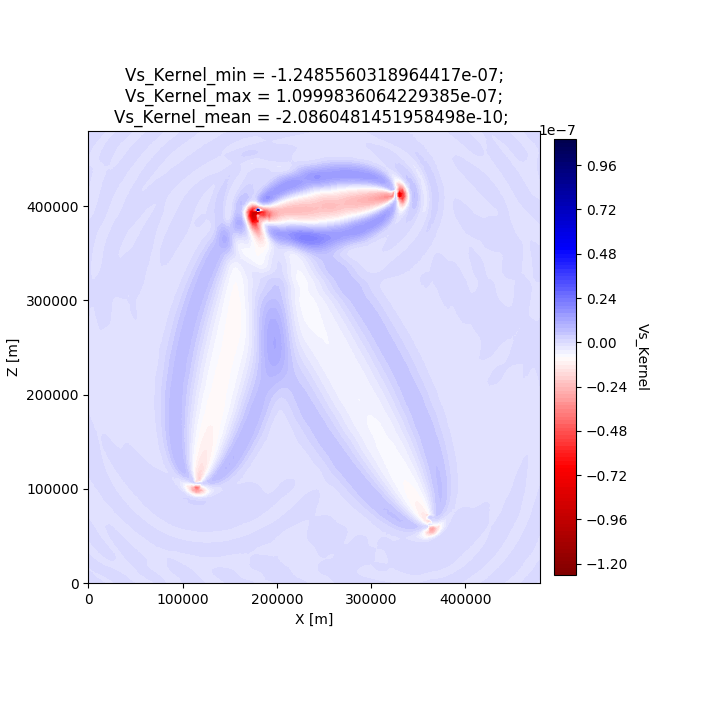

In [9]:
# Because this docs page was made in a Jupyter Notebook, we need to use IPython to open the resulting .png
from IPython.display import Image
Image(filename='i02_gradient_vs_kernel.png') 

### Example \#2
Example \#2 runs a 1 iteration inversion using SPECFEM2D, the Pyaflowa preprocessing module and an L-BFGS optimization algorithm. It successfully completes the line search and is meant to illustrate the output of the Pyaflowa preprocessing module.

In [2]:
! seisflows examples 2

2 example: ex2_specfem2d_workstation_inversion_w_pyatoa

                                    @@@@@@@@@@                        
                               .@@@@.    .%&(  %@.          
                            @@@@   @@@@   &@@@@@@ ,%@       
                         @@@@   @@@,  /@@              @    
                        @@@   @@@@   @@@              @     
                      @@@@   @@@@   @@@                @  @ 
                      @@@   @@@@   ,@@@                @ @  
                     @@@@   @@@@    @@@@              @@ @ @
                     @@@@   @@@@@    @@@@@          @@@ @@ @
                     @@@@    @@@@@     @@@@@@@@@@@@@@  @@  @
                      @@@@    @@@@@@        @@@&     @@@  @ 
                      @@@@@     @@@@@@@@         %@@@@#  @@ 
                        @@@@#      @@@@@@@@@@@@@@@@@   @@   
                         &@@@@@          @@@@(       @@&    
                            @@@@@@@             /@@@@       
                  

You can run the example with the same command as shown for Example 1:

In [ ]:
! seisflows examples run 2 -r path/to/specfem2d